AdaBoost is provided via the [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html) 
and [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)  classes.

# AdaBoost for Classification

In this section, we will look at using AdaBoost for a classification problem.

First, we can use the [make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to create a synthetic binary classification problem with 1,000 examples and 20 input features.

The complete example is listed below.

In [1]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Next, we can evaluate an AdaBoost algorithm on this dataset.

We will evaluate the model using [repeated stratified k-fold cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/), with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds. Running the example below reports the mean and standard deviation accuracy of the model :

In [2]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores) ) )

Accuracy: 0.806 (0.041)


We can also use the AdaBoost model as a final model and make predictions for classification.

First, the AdaBoost ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

The example below demonstrates this on our binary classification dataset.Running the example below fits the AdaBoost ensemble model on the entire dataset and is then used to make a prediction on a new row of data

In [3]:
# make predictions using adaboost for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
# define the model
model = AdaBoostClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-3.47224758,1.95378146,0.04875169,-0.91592588,-3.54022468,1.96405547,-7.72564954,-2.64787168,-1.81726906,-1.67104974,2.33762043,-4.30273117,0.4839841,-1.28253034,-10.6704077,-0.7641103,-3.58493721,2.07283886,0.08385173,0.91461126]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


# AdaBoost for Regression

In this section, we will look at using AdaBoost for a regression problem.

First, we can use the [make_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function to create a synthetic regression problem with 1,000 examples and 20 input features.

The complete example is listed below.

In [4]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Next, we can evaluate an AdaBoost algorithm on this dataset.

As we did with the last section, we will evaluate the model using repeated k-fold cross-validation, with three repeats and 10 folds. We will report the mean absolute error (MAE) of the model across all repeats and folds. The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

Running the example below reports the mean and standard deviation accuracy of the adaboost regression model.

In [5]:
# evaluate adaboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -72.531 (4.692)


We can also use the AdaBoost model as a final model and make predictions for regression.

First, the AdaBoost ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

Running the example below fits the AdaBoost ensemble model on the entire dataset and is then used to make a prediction on a new row of data, as we might when using the model in an application.

In [6]:
# adaboost ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# define the model
model = AdaBoostRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[1.20871625,0.88440466,-0.9030013,-0.22687731,-0.82940077,
        -1.14410988,1.26554256,-0.2842871,1.43929072,0.74250241,
        0.34035501,0.45363034,0.1778756,-1.75252881,-1.33337384,
        -1.50337215,-0.45099008,0.46160133,0.58385557,-1.79936198]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 4


# AdaBoost Hyperparameters

In this section, we will take a closer look at some of the hyperparameters you should consider tuning for the AdaBoost ensemble and their effect on model performance.

## Explore Number of Trees

An important hyperparameter for AdaBoost algorithm is the number of decision trees used in the ensemble.

Recall that each decision tree used in the ensemble is designed to be a weak learner. That is, it has skill over random prediction, but is not highly skillful. As such, one-level decision trees are used, called decision stumps.

The number of trees added to the model must be high for the model to work well, often hundreds, if not thousands.

The number of trees can be set via the “n_estimators” argument and defaults to 50.

The example below explores the effect of the number of trees with values between 10 to 5,000.

>10 0.773 (0.039)
>50 0.806 (0.041)
>100 0.801 (0.032)
>500 0.793 (0.028)
>1000 0.791 (0.032)
>5000 0.783 (0.031)


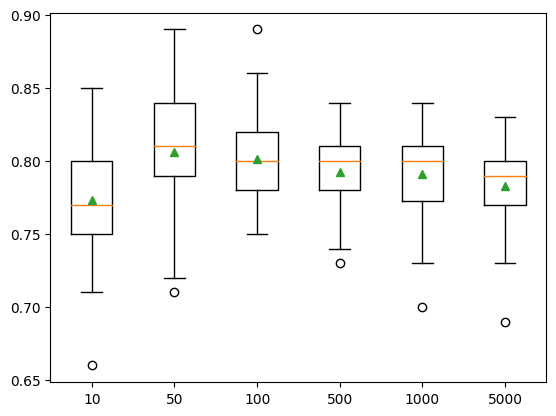

In [7]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Running the example first reports the mean accuracy for each configured number of decision trees.

In this case, we can see that that performance improves on this dataset until about 50 trees and declines after that. This might be a sign of the ensemble overfitting the training dataset after additional trees are added.

A box and whisker plot is created for the distribution of accuracy scores for each configured number of trees.
We can see the general trend of model performance and ensemble size.

## Explore Depth

A decision tree with one level is used as the weak learner by default.

We can make the models used in the ensemble less weak (more skillful) by increasing the depth of the decision tree.

The example below explores the effect of increasing the depth of the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) weak learner on the AdBoost ensemble.

>1 0.806 (0.041)
>2 0.864 (0.029)
>3 0.869 (0.028)
>4 0.890 (0.035)
>5 0.915 (0.025)
>6 0.920 (0.024)
>7 0.923 (0.018)
>8 0.933 (0.024)
>9 0.923 (0.025)
>10 0.938 (0.024)
>11 0.885 (0.073)
>12 0.823 (0.048)
>13 0.807 (0.040)
>14 0.796 (0.040)
>15 0.802 (0.038)


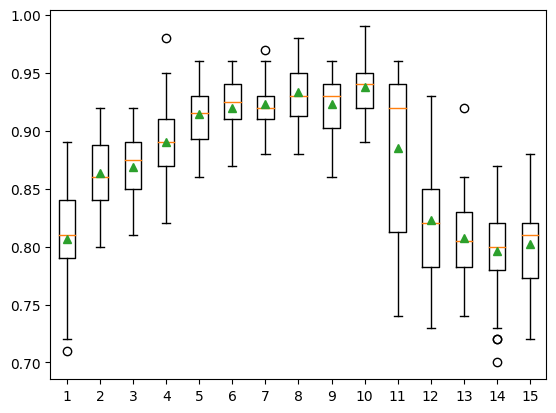

In [8]:
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 15
	for i in range(1,16):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Running the example first reports the mean accuracy for each configured weak learner tree depth.
we can see that that performance improves on this dataset till depth = 10 and declines after that. This might be a sign of the ensemble overfitting the training dataset after too much increase in depth.

## Explore Learning Rate

AdaBoost also supports a learning rate that controls the contribution of each model to the ensemble prediction.

This is controlled by the “learning_rate” argument and by default is set to 1.0 or full contribution. Smaller or larger values might be appropriate depending on the number of models used in the ensemble. There is a balance between the contribution of the models and the number of trees in the ensemble.

More trees may require a smaller learning rate; fewer trees may require a larger learning rate. It is common to use values between 0 and 1 and sometimes very small values to avoid overfitting such as 0.1, 0.01 or 0.001.

The example below explores learning rate values between 0.1 and 2.0 in 0.1 increments.

>0.100 0.767 (0.049)
>0.200 0.786 (0.042)
>0.300 0.802 (0.040)
>0.400 0.798 (0.037)
>0.500 0.805 (0.042)
>0.600 0.795 (0.031)
>0.700 0.799 (0.035)
>0.800 0.801 (0.033)
>0.900 0.805 (0.032)
>1.000 0.806 (0.041)
>1.100 0.801 (0.037)
>1.200 0.800 (0.030)
>1.300 0.799 (0.041)
>1.400 0.793 (0.041)
>1.500 0.790 (0.040)
>1.600 0.775 (0.034)
>1.700 0.767 (0.054)
>1.800 0.768 (0.040)
>1.900 0.736 (0.047)
>2.000 0.682 (0.048)


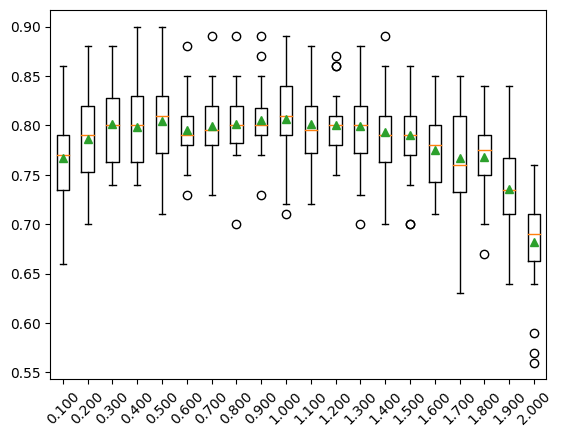

In [9]:
# explore adaboost ensemble learning rate effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

Running the example first reports the mean accuracy for each configured learning rate.
A box and whisker plot is created for the distribution of accuracy scores for each configured learning rate.

In this case, we can see similar values between 0.5 to 1.0 and a decrease in model performance after that.

## Explore Alternate Algorithm

The default algorithm used in the ensemble is a decision tree, although other algorithms can be used.

The intent is to use very simple models, called weak learners. Also, the scikit-learn implementation requires that any models used must also support weighted samples, as they are how the ensemble is created by fitting models based on a weighted version of the training dataset.

The base model can be specified via the “base_estimator” argument. The base model must also support predicting probabilities or probability-like scores in the case of classification. If the specified model does not support a weighted training dataset, you will see an error message as follows:

ValueError: KNeighborsClassifier doesn't support sample_weight.

One example of a model that supports a weighted training is the logistic regression algorithm.

The example below demonstrates an AdaBoost algorithm with a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) weak learner.

In [10]:
# evaluate adaboost algorithm with logistic regression weak learner for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.794 (0.032)


Running the example reports the mean and standard deviation accuracy of the model.

In this case, we can see the AdaBoost ensemble with a logistic regression weak model achieves a classification accuracy of about 79 percent on this test dataset.

## Grid Search AdaBoost Hyperparameters

AdaBoost can be challenging to configure as the algorithm as many key hyperparameters that influence the behavior of the model on training data and the hyperparameters interact with each other.

As such, it is a good practice to use a search process to discover a configuration of the model hyperparameters that works well or best for a given predictive modeling problem. Popular search processes include a random search and a grid search.

In this section we will look at grid searching common ranges for the key hyperparameters for the AdaBoost algorithm that you can use as starting point for your own projects. This can be achieving using the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class and specifying a dictionary that maps model hyperparameter names to the values to search.

In this case, we will grid search two key hyperparameters for AdaBoost: the number of trees used in the ensemble and the learning rate. We will use a range of popular well performing values for each hyperparameter.

Each configuration combination will be evaluated using repeated k-fold cross-validation and configurations will be compared using the mean score, in this case, classification accuracy.

The complete example of grid searching the key hyperparameters of the AdaBoost algorithm on our synthetic classification dataset is listed below.

In [11]:
# example of grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# grid['max_depth'] = [range(1,11)]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813667 using {'learning_rate': 0.1, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.647000 (0.038136) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.646667 (0.036545) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.647000 (0.038136) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.654333 (0.045511) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.672667 (0.046543) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.648333 (0.042197) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.671667 (0.045613) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.715000 (0.053213) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.767667 (0.045948) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.716667 (0.048876) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.767000

Running the example many take a while. At the end of the run, the configuration that achieved the best score is reported first, followed by the scores for all other configurations that were considered.

In this case, we can see that a configuration with 500 trees and a learning rate of 0.1 performed the best with a classification accuracy of about 81.3 percent.

The model may perform even better with more trees such as 1,000 or 5,000 although these configurations were not tested in this case to ensure that the grid search completed in a reasonable time.

## Additional Resources :

- https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/

- [A desicion-theoretic generalization of on-line learning and an application to boosting](https://link.springer.com/chapter/10.1007/3-540-59119-2_166)

- [multiclass adaboost](https://www.intlpress.com/site/pub/pages/journals/items/sii/content/vols/0002/0003/a008/)

- https://en.wikipedia.org/wiki/AdaBoost

- [Improved Boosting Algorithms Using Confidence-rated Predictions](https://link.springer.com/article/10.1023/A:1007614523901)

- [Explaining AdaBoost](https://link.springer.com/chapter/10.1007/978-3-642-41136-6_5)

- [Tuning the hyper-parameters of an estimator using GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)